In [28]:
import tensorflow as tf
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pandas as pd
print(tf.__version__) #checking the version

2.7.0-dev20210910


## Load the dataset into train/test set

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualize the data

In [7]:
fig = px.imshow(X_train[0])
fig.show()

## Reducing the extra features as the border of the image has lot of unused pixels

In [33]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_train_flat)

In [23]:
x_train_flat = X_train.reshape(-1,784)

In [29]:
pd.DataFrame(x_train_flat)

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
59995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
59996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
59997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
59998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
59999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[60000 rows x 784 columns]

In [39]:
principal_cifar_Df = pd.DataFrame(data = x_principal
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df

principal component 1  principal component 2  y
0                   0.486010              -1.226246  5
1                   3.967525              -1.156299  0
2                  -0.203330               1.537953  4
3                  -3.133830              -2.381244  1
4                  -1.500999               2.864936  9
...                      ...                    ... ..
59995              -0.390671              -1.150861  8
59996               0.599049              -2.697639  3
59997              -0.698252               0.627727  5
59998               0.512180              -0.021880  6
59999              -0.680138              -0.096924  8

[60000 rows x 3 columns]

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

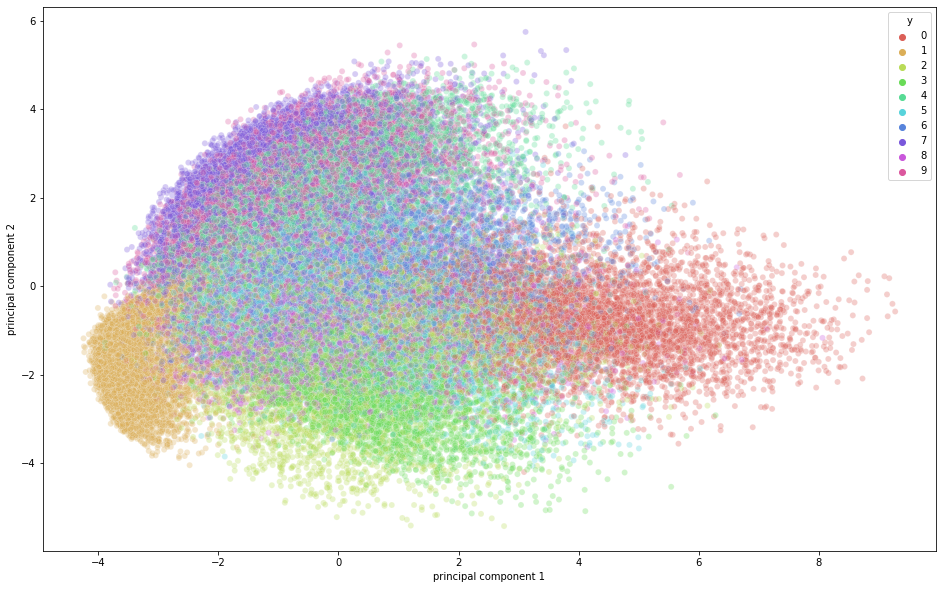

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [43]:
px.scatter(principal_cifar_Df, x="principal component 1", y="principal component 2",color='y')

In [46]:
principal_cifar_Df

principal component 1  principal component 2  y
0                   0.486010              -1.226246  5
1                   3.967525              -1.156299  0
2                  -0.203330               1.537953  4
3                  -3.133830              -2.381244  1
4                  -1.500999               2.864936  9
...                      ...                    ... ..
59995              -0.390671              -1.150861  8
59996               0.599049              -2.697639  3
59997              -0.698252               0.627727  5
59998               0.512180              -0.021880  6
59999              -0.680138              -0.096924  8

[60000 rows x 3 columns]

In [53]:
principal_cifar_Df.drop('y', axis=1).to_numpy()[:1]

array([[ 0.48600973, -1.22624624]])

In [86]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [73]:
from tensorflow.keras.utils import plot_model

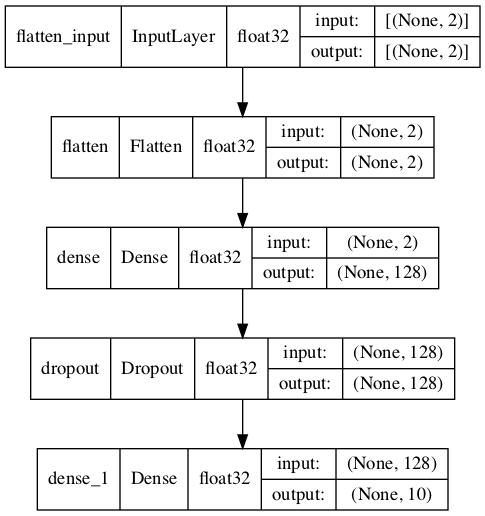

In [75]:
plot_model(model,     show_shapes=True,
    show_dtype=True)

In [54]:
predictions = model(principal_cifar_Df.drop('y', axis=1).to_numpy()[:1]).numpy()
predictions

array([[-0.11107901,  0.08134757, -0.16898867,  0.19308332, -0.07343628,
        -0.4780729 , -0.14333904,  0.09197072, -0.45602182, -0.1416536 ]],
      dtype=float32)

In [59]:
tf.nn.softmax(predictions).numpy().argmax()

3

In [61]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [62]:
loss_fn(y_train[:1], predictions).numpy()


2.6809266

In [97]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [98]:
train_data = principal_cifar_Df.iloc[:, :2].to_numpy()
model.fit(principal_cifar_Df.drop('y', axis=1).to_numpy(), y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4277 - accuracy: 0.4259
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3512 - accuracy: 0.4505
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3404 - accuracy: 0.4570: 0s - l
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step 

In [106]:
model.evaluate(pca.transform(X_test.reshape(-1,784)),  y_test, verbose=2)


313/313 - 1s - loss: 5.1651 - accuracy: 0.1253 - 847ms/epoch - 3ms/step


[5.165096282958984, 0.12530000507831573]

In [107]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [108]:
probability_model(pca.transform(X_test.reshape(-1,784))[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.06743006e-04, 1.13185622e-01, 5.17306983e-01, 1.80010080e-01,
        6.03736225e-05, 2.39923354e-02, 2.25989930e-02, 8.83208995e-04,
        1.40986726e-01, 8.68915115e-04],
       [1.09078892e-05, 6.96011870e-09, 1.70144282e-04, 1.69099774e-04,
        2.93203145e-01, 1.06623548e-03, 3.03356763e-04, 3.36550295e-01,
        9.83901904e-04, 3.67542863e-01],
       [1.95127740e-07, 1.15334886e-04, 1.18549608e-04, 3.20920517e-04,
        5.04285768e-02, 4.39186515e-05, 6.50047195e-06, 6.71933293e-01,
        5.13874738e-06, 2.77027667e-01],
       [9.28324640e-01, 9.60986171e-08, 1.47109870e-02, 1.55628880e-03,
        6.76631462e-05, 1.32344235e-02, 2.71092653e-02, 1.36571325e-05,
        1.16515690e-02, 3.33142933e-03],
       [1.14524411e-03, 4.16538736e-04, 2.17688814e-01, 6.49229765e-01,
        1.89011132e-06, 5.47018126e-02, 6.48133829e-03, 1.91404542e-05,
        7.00611472e-02, 2.54281418e-04]], dtype=float32)>